In [21]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [22]:
movies = pd.read_csv("ratings_small.csv")
movies.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [23]:
#deleting the variable timestamp
movies = movies.drop("timestamp", axis = 1)

In [24]:
movies

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


# Exploring the data

In [25]:
#checking the shape
movies.shape #i.e we have 100,004 rows and 3 columns

(100004, 3)

In [26]:
#checking for missing values
movies.isnull().sum() #hence there are no missing values in the data set

userId     0
movieId    0
rating     0
dtype: int64

In [27]:
#checking total no of unique users in the dataset
movies["userId"].nunique() #i.e there are 671 unique users

671

In [28]:
#checking total no of unique movies
movies["movieId"].nunique() #there are 9066 unique movies

9066

In [29]:
#which user has rated the most
user_ratings = movies.groupby("userId")["rating"].count()
top_user = user_ratings.sort_values(ascending = False)
top_user #i.e user 547 has rated most movies in the dataset

userId
547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: rating, Length: 671, dtype: int64

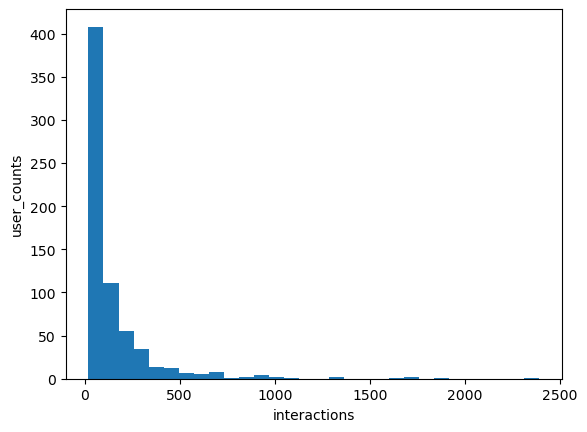

In [30]:
#create a histogram f all interactions by all the users present in the dataset
#we first create a group by function of all the userId, and ratings
interactions = movies.groupby("userId")["rating"].count()
interactions
#next we plot a histogram of all these interactions, i.e user counts vs. number of times user has rated a movie
plt.hist(interactions, bins = 30) #bins , i.e  axis scale
plt.xlabel("interactions")
plt.ylabel("user_counts")
plt.show()
#hence we can see that very few number of users have rated movies more than 800, the distribution is rightly skewed

#Creating User Item Matrix

In [31]:
#to create this matrix we can use pivot table or groupby method, to display user id as rows, and movie ids as cols , and ratings as values
matrix = movies.pivot(index = "userId", columns = "movieId", values= "rating")
matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#check shape of the above matrix
matrix.shape #i.e all unique user ids became rows, and movie Id are col

(671, 9066)

In [33]:
#check the head of this matrix
matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#replcae all missing values with 0
matrix.fillna(0, inplace = True)
matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Finding Similar Users

In [35]:
#importing cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
#We define a function to find similar users to the given user, for this we compute the cosine similarity of each user with the provided user, using the interaction matric
def similar_user(user_id, matrix):
    #first we compute the cosine similarity for each user and put it in an empty list
    similarity = [] #creting an empty list
    #computing cosine similarity for each user in range (1,642) i.e to start fro user id 1 until 671
    #matrix.shape[0] = 671, as matrix.shape is (671, 9066)
    for users in range(1, matrix.shape[0]+1):
        cos = cosine_similarity([matrix.loc[user_id]], [matrix.loc[users]]) #1st term is matrix.loc[user_id], i.e interactions matrix for the user for whom we wish to calculate the score
        #2nd term is matrix of all the usres
        #Appending the list
        similarity.append((users, cos)) #appending the list with the user id, and the cos sinilarity
        #nect we sort it by similarity #we give x[1], to sort as per the cos value, having pos 1
    similarity.sort(key = lambda x:x[1], reverse = True)
    #we only want user ids, hence we create a list of only user ids #to do this we use a list comprehension, and extract 1st element, i.e 0th pos , and i[0], as we only want userid

    most_similar_users = [i[0] for i in similarity]
    #creating a list of similarity score
    similarity_score = [j[1] for j in similarity]
    
    #next we remove the users own id from the list
    most_similar_users.remove(user_id)
    #removing the same for similarity_score
    similarity_score = similarity_score[1:]
    return most_similar_users, similarity_score
    

In [91]:
#to get only top 5 most similar users 
similar_user(544, matrix)[0][:5]

[152, 72, 615, 664, 596]

In [92]:
#TO GET TO 5 USER SCORES
similar_user(544, matrix)[1][:5]

[array([[0.38737401]]),
 array([[0.3793767]]),
 array([[0.33536354]]),
 array([[0.3321229]]),
 array([[0.32413425]])]

#creating similarity based collaborative recommendation system

In [129]:
def recommendations(user_id, num_movies, matrix):
    #find most similar users for the userid for which we want to recommend movies
    most_similar_user = similar_user(user_id, matrix)[0]
    #find out those movies that the user has already interacted with, i.e movies for which that user has given a rating
    #for this we use np.where to get the loc of the matrix columns for which the ratings for that particular userid is greater than 0, then we convert that to a list, then that list to a set to avoid duplicates when copying
    movie_ids = set(list(matrix.columns[np.where(matrix.loc[user_id]>0)]))
    #create an empty list to store the recommended movies
    recommendations = []
    #copy those movies which the user has already interracted with, i.e movie ids, for which ratings are >0
    already_interracted = movie_ids.copy()
    #next we loop through each similar user from the list f most_similr users
    for similar in most_similar_user:
        #we need to implement this code until the no of recommended movies becmes equal to num_movies
        if len(recommendations)<num_movies:
            #we store all the movies interracted by the similar users of user_id
            rec = set(list(matrix.columns[np.where(matrix.loc[similar]>0)]))
            #next we add these movies to the recommendation list, leaving the ones that out user has interracted with
            recommendations.extend(list(rec.difference(already_interracted)))#we are extending the recommendations list with the list of recommended movies, minus the ones already witnrracted with
        #we add the recommended movies to the list of already inteercated ones
            already_interracted = already_interracted.union(rec)
        
        else:
            break
    return recommendations[:num_movies] #returning only the no of recommendations asked for
    
    

In [131]:
recommendations(30,5,matrix)

[3, 5, 7, 4103, 2058]

In [134]:
#for a new user, we do not have any interractions to recommend based on similar users, here we go for rank based recommendation, i.e recommending the most popular movies
#we can do this here by using the value counts of the movie id, i.e for whihc movies are the value counts highest
movies["movieId"].value_counts()[:3] #recommending top 3 only

C:\Users\lexus\AppData\Local\Temp\ipykernel_6236\3280420690.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  movies["movieId"].value_counts()[:3]


356    341
296    324
318    311
Name: movieId, dtype: int64